In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.fusion2d import main as fusion2d
from src.tools import *

matplotlib_settings()

In [2]:
# set params manually. see argparse settings in fusion2d for details.
# datafile = "dh_dh_exp0_tr8_xr3_yr3_en1.npy"
# datafile = "dh_dh_exp0_tr8_xr5_yr5_en1.npy"
datafile = "dh_dh_exp0_tr8_xr10_yr10_en1.npy"
valid_n = 500
epochs = 3000
bs = 128
lr = 5e-5
l1,l2 = 2759,296
dp1,dp2 = 0.3,0.0
DEVRUN = False
MAKEFIGS = False
MAKEVIDS = False

out = fusion2d(datafile,valid_n,epochs,bs,lr,l1,l2,dp1,dp2,DEVRUN,MAKEFIGS,MAKEVIDS)
(train_x, train_y, train_r), (valid_x, valid_y, valid_r) = out

train_x train_y [(2230, 50), (2230, 5000)]
valid_x valid_y [(500, 50), (500, 5000)]


  0%|          | 0/3000 [00:00<?, ?it/s]

Early stop. Min validation loss 0.015215669699013234 on epoch 468
train_loss: 0.010676227361083422
valid_loss: 0.015381571981576265


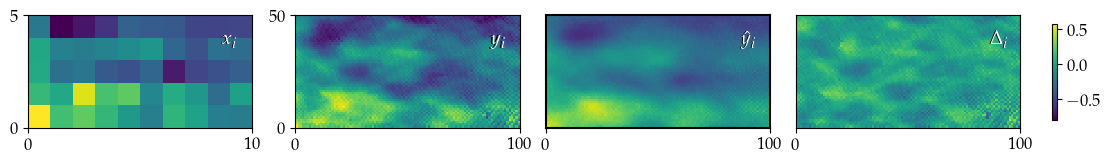

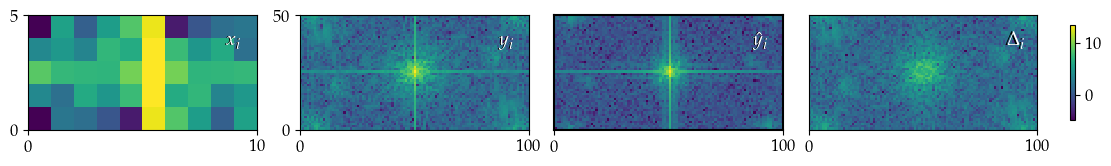

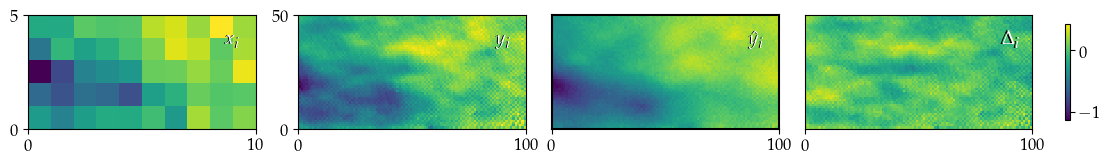

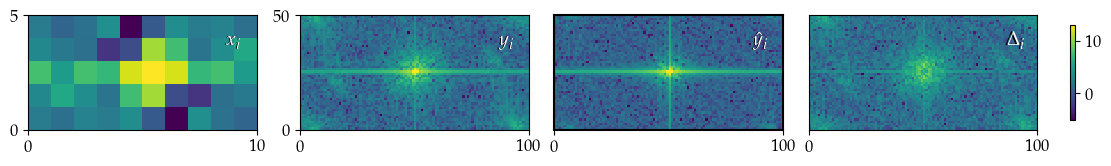

In [3]:
_, ax = plot_2d_result(train_x, train_y, train_r, t=0, diff=True)
for pos in ['top', 'bottom', 'right', 'left']:
    ax[2].spines[pos].set_linewidth(1.5)
plt.savefig(f"figs/fusion2d_train.png",transparent=False, bbox_inches='tight', dpi=300)


_, ax = plot_2d_result(train_x, train_y, train_r, t=0, diff=True, 
                        apply_map=lambda x: np.log(psd2(x)))
for pos in ['top', 'bottom', 'right', 'left']:
    ax[2].spines[pos].set_linewidth(1.5)
plt.savefig(f"figs/fusion2d_train_psd.png",transparent=False, bbox_inches='tight', dpi=300)


_, ax = plot_2d_result(valid_x, valid_y, valid_r, t=0, diff=True)

plt.savefig(f"figs/fusion2d_valid.png",transparent=False, bbox_inches='tight', dpi=300)


_, ax = plot_2d_result(valid_x, valid_y, valid_r, t=0, diff=True, 
                        apply_map=lambda x: np.log(psd2(x)))
for pos in ['top', 'bottom', 'right', 'left']:
    ax[2].spines[pos].set_linewidth(1.5)
plt.savefig(f"figs/fusion2d_valid_psd.png",transparent=False, bbox_inches='tight', dpi=300)


In [8]:
train_r.reshape((*train_r.shape[1:],-1)).shape

(50, 100, 2230)

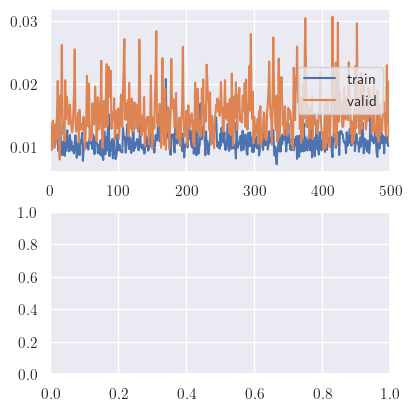

In [10]:
import seaborn
seaborn.set()

n = 500

def vectorize_2d_timeseries(x):
    return x.reshape(-1,np.product(x.shape[1:]))

fig,ax = plt.subplots(2,1,figsize=(4,4),constrained_layout=True)
ax[0].plot(mse_snapshots(*map(vectorize,[train_r,train_y]))[:n],'-',label="train")
ax[0].plot(mse_snapshots(*map(vectorize,[valid_r,valid_y])),'-',label="valid")
ax[0].set_xlim(0,n)
ax[0].legend(loc='right')

# ax[1].plot(mse_snapshots(np.repeat(train_x,2048//32,axis=1),train_y)[:500])
# ax[1].plot(mse_snapshots(train_r,train_y)[:500])

# ax[2].plot(mse_snapshots(np.repeat(valid_x,2048//32,axis=1),valid_y)[:500])
# ax[2].plot(mse_snapshots(valid_r,valid_y)[:500])